In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/muriloleandro/notebooks_data/main/datasets/pony.csv")

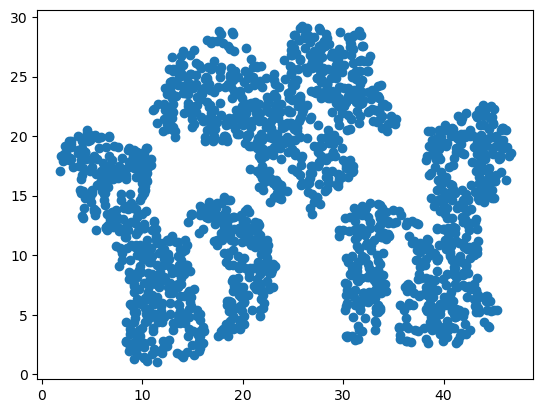

In [12]:
plt.scatter(data["X"], data["Y"])
plt.show()

In [27]:
def dist(P, Q):
    return np.sqrt((P[0]-Q[0])**2 + (P[1]-Q[1])**2) # euclidiano

def listar_vizinhos(P, pontos, eps):
    vizinhos = []
    for Q in pontos:
        if dist(P, Q) <= eps:
            vizinhos.append(Q)
    return vizinhos

def DBSCAN(pontos, eps, min_pts):
    C = 0 # categoria 0
    for i in range(len(pontos)):
        P = pontos[i]
        
        if P[2] != "": continue
        vizinhos = listar_vizinhos(P, pontos, eps)
        if len(vizinhos) < min_pts:
            pontos[i][2] = "-1" # Ruído
            continue
            
        C += 1
        pontos[i][2] = C # início do cluster
        
        S = [] # pontos do cluster
        for V in vizinhos:
            if V != P:
                S.append(V) #inicializar S com a vizinhança de P
                
        for Q in S:
            if Q[2] == "-1": Q[2] = C # Sobrescrever ruído
            if Q[2] != "": continue # ignorar pontos já visitados
            Q[2] = C
            vizinhos_Q = listar_vizinhos(Q, pontos, eps)
            if len(vizinhos_Q) >= min_pts: # expandir classe para outros núcleos
                for V in vizinhos_Q:
                    S.append(V)
            
    return pontos

In [44]:
epsilon = 1.5
M = 4
pontos = [[data["X"][i], data["Y"][i], ""] for i in range(len(data["X"]))]

classificado = DBSCAN(pontos, epsilon, M)

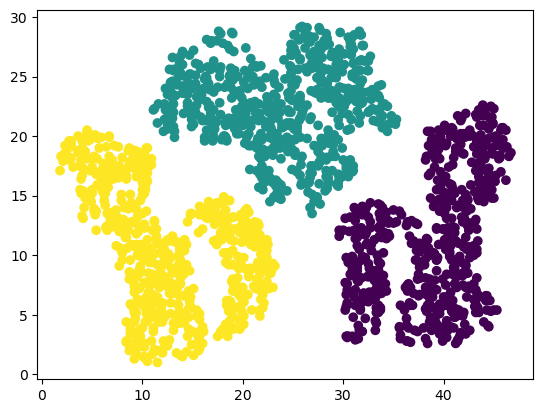

In [46]:
plt.scatter(list(zip(*classificado))[0], list(zip(*classificado))[1], c=list(zip(*classificado))[2])
plt.show()